#### Used the below code with scrapy module to scrape the data from the amazon website and stored the reviews in a csv file.

-----------------

import scrapy

class AmazonReviewsSpider(scrapy.Spider):
    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']

    # Base URL for the MacBook air reviews
    myBaseUrl = "https://www.amazon.in/product-reviews/B07WGD8QQT/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')

            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars': ''.join(review.xpath('.//text()').extract()),
                      'comment': ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1

In [1]:
import pandas as pd
reviews=pd.read_csv('reviews.csv', encoding = 'Latin-1')
reviews

,id,profileName,text,date,title,rating,images,helpful,Colour
0,R1BI9N1D7ECEA3,Dinesh,good,Reviewed in India EEE®EEE³ on 2 June 2023,Good,4,NaN,0,Grey Dazzle
1,RNWWNASZ3F00T,Shailza shukla,If planning to buy a semi automatic washing ma...,Reviewed in India EEE®EEE³ on 19 May 2023,Value for money.,4,NaN,1,Grey Dazzle
2,R2RCRF2G9B3H8H,Mohamed Sulaiman M,It is running Noisy.But washing the clothes li...,Reviewed in India EEE®EEE³ on 7 May 2023,Running Noisy,4,NaN,0,Grey Dazzle
3,R11C371VH0YHYR,Amaan,Ok,Reviewed in India EEE®EEE³ on 8 May 2023,Ok,4,NaN,0,Grey Dazzle
4,R38TKTFSEEWVRQ,Suresh,It is cost effective model so it's body part a...,Reviewed in India EEE®EEE³ on 26 April 2023,Whirlpool washing Machine semi automatic,4,NaN,2,Grey Dazzle
...,...,...,...,...,...,...,...,...,...
1448,R3UH3MB8K0V1JP,Dheeraj jain,Hope this will be less power consumption product,Reviewed in India EEE®EEE³ on 19 Novembe...,Dheeraj,4,NaN,0,Grey Dazzle
1449,R29AL78TFTGJLL,V.Revathi,It's very good,Reviewed in India EEE®EEE³ on 27 Novembe...,EE¤EEEEEEEEEgood,5,NaN,0,Grey Dazzle
1450,R3LSHMKBAUXXSC,Easwaran,Very support whirlpool team very,Reviewed in India EEE®EEE³ on 4 Septembe...,My customer very happy,5,NaN,0,Grey Dazzle
1451,R3H5XNDRYTCPD5,Makarand,Machine is too good and deliveries of awesome ...,Reviewed in India EEE®EEE³ on 12 October...,Very good proudect,4,https://m.media-amazon.com/images/I/710solj17C...,0,Grey Dazzle


In [2]:
reviews.shape

(1453, 9)

In [3]:
reviews.head(20)

,id,profileName,text,date,title,rating,images,helpful,Colour
0,R1BI9N1D7ECEA3,Dinesh,good,Reviewed in India EEE®EEE³ on 2 June 2023,Good,4,NaN,0,Grey Dazzle
1,RNWWNASZ3F00T,Shailza shukla,If planning to buy a semi automatic washing ma...,Reviewed in India EEE®EEE³ on 19 May 2023,Value for money.,4,NaN,1,Grey Dazzle
2,R2RCRF2G9B3H8H,Mohamed Sulaiman M,It is running Noisy.But washing the clothes li...,Reviewed in India EEE®EEE³ on 7 May 2023,Running Noisy,4,NaN,0,Grey Dazzle
3,R11C371VH0YHYR,Amaan,Ok,Reviewed in India EEE®EEE³ on 8 May 2023,Ok,4,NaN,0,Grey Dazzle
4,R38TKTFSEEWVRQ,Suresh,It is cost effective model so it's body part a...,Reviewed in India EEE®EEE³ on 26 April 2023,Whirlpool washing Machine semi automatic,4,NaN,2,Grey Dazzle
5,R1UTZJRQ3RD0S8,Anoop,Buzzer is not there. Otherwise it is completel...,Reviewed in India EEE®EEE³ on 21 April 2023,Good for daily use,4,NaN,3,Grey Dazzle
6,RHJ00Q6Q4PSAM,Paul Gobburi,Good with all the provided functions,Reviewed in India EEE®EEE³ on 22 April 2023,Nice product,4,NaN,0,Grey Dazzle
7,R2XNCFNWBJG8HJ,TJ,This is the first time I've ever used a semiau...,Reviewed in India EEE®EEE³ on 3 April 2023,"Good, but I would have wanted to know...",3,https://m.media-amazon.com/images/I/71LaH-nOCh...,6,Grey Dazzle
8,R1PE67EIHKK6TI,Abhishek,If you are looking for a light washing machine...,Reviewed in India EEE®EEE³ on 22 May 2023,Overall a good buy,5,NaN,0,Grey Dazzle
9,RP4I627R7P1BX,Mohammed,Good working value for money,Reviewed in India EEE®EEE³ on 9 June 2023,Good,3,NaN,0,Grey Dazzle


In [4]:
reviews = pd.DataFrame(reviews['text'])
reviews.columns = ['comment']
reviews['comment'] = reviews['comment'].astype('string')

In [5]:
reviews.dropna(inplace = True)

In [6]:
reviews

,comment
0,good
1,If planning to buy a semi automatic washing ma...
2,It is running Noisy.But washing the clothes li...
3,Ok
4,It is cost effective model so it's body part a...
...,...
1448,Hope this will be less power consumption product
1449,It's very good
1450,Very support whirlpool team very
1451,Machine is too good and deliveries of awesome ...


In [7]:
reviews = [comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews = [comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['good',
 "If planning to buy a semi automatic washing machine then this is good for the price. The problem is just the outlet pipe which is small and also it doesn't hang up on the hook provided. Else great product.",
 'It is running Noisy.But washing the clothes like other brand washing Machine',
 'Ok',
 "It is cost effective model so it's body part are light",
 'Buzzer is not there. Otherwise it is completely fine to use.  Sharing review after 3 months of its use.',
 'Good with all the provided functions',
 "This is the first time I've ever used a semiautomatic washer/dryer instead of an automatic set and it is very easy.I live upstairs and could move the machine up the stairs with ease. There are a couple things I wish I knew beforehand though.1. There is hose that comes with it but it doesn't fit my water spout so I have to fill a bucket of water to dump into the washer.2. The dryer doesn't heat the clothes to dry, it only spins really fast to get excess water out.3. It doesn't ri

In [8]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [9]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Sharing review after 3 months of its use.',
 "Good with all the provided functions This is the first time I've ever used a semiautomatic washer/dryer instead of an automatic set and it is very easy.I live upstairs and could move the machine up the stairs with ease.",
 'There are a couple things I wish I knew beforehand though.1.',
 "There is hose that comes with it but it doesn't fit my water spout so I have to fill a bucket of water to dump into the washer.2.",
 "The dryer doesn't heat the clothes to dry, it only spins really fast to get excess water out.3.",
 "It doesn't rinse the clothes at all.",
 'I do a second wash cycle without soap after ringing the clothes out to rinse.4.',
 'The dryer is incredibly small compared to the washer.',
 'I doubt I could fit a comforter inside it.5.',
 "The dryer doesn't necessarily dry the clothes."]

In [10]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,good If planning to buy a semi automatic washi...
1,The problem is just the outlet pipe which is s...
2,Else great product.
3,It is running Noisy.But washing the clothes li...
4,Otherwise it is completely fine to use.
...,...
1100,"Easy to use, regulated movement, light weight,..."
1101,"LOW WATER CONSUMPTION, ELEGANT DESIGN."
1102,BUDGET FRIENDLY.
1103,I like more use to easy to handle and results ...


In [11]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [12]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [13]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [14]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1    20
2     3
3    28
4     7
5     8
6    39
7    11
8    28
9    18
Name: word_count, dtype: int64

In [15]:
sent_df

,sentence,sentiment_value,word_count
0,good If planning to buy a semi automatic washi...,6,17
1,The problem is just the outlet pipe which is s...,-2,20
2,Else great product.,3,3
3,It is running Noisy.But washing the clothes li...,4,28
4,Otherwise it is completely fine to use.,2,7
...,...,...,...
1100,"Easy to use, regulated movement, light weight,...",4,15
1101,"LOW WATER CONSUMPTION, ELEGANT DESIGN.",2,5
1102,BUDGET FRIENDLY.,0,2
1103,I like more use to easy to handle and results ...,13,22


In [16]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
1104,Hope this will be less power consumption produ...,25,50
542,Overall this works fine Superbbb washing machi...,27,41
820,Nice product nice colour I am happy Very good ...,27,41
731,Amazon delivered it within in 36 hoursThanks t...,29,64
838,Good to use i am so happy EEEE Very good t...,31,38
627,Good PerformanceFast Moving Spinner & Make a h...,34,89
847,Worth buying washing Machine is superb EEE...,38,85
872,Body is so durable qnd weak that whenever you ...,38,148
855,Thank you..good delivery service good product ...,39,77
917,Buy this Too good Good product Good product Pr...,39,67


In [17]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1105.000000
mean        2.505882
std         5.275920
min       -22.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        39.000000
Name: sentiment_value, dtype: float64

In [18]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-19-6702561ade1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

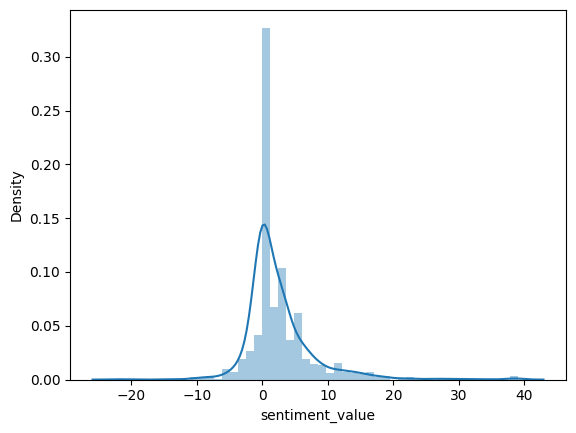

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

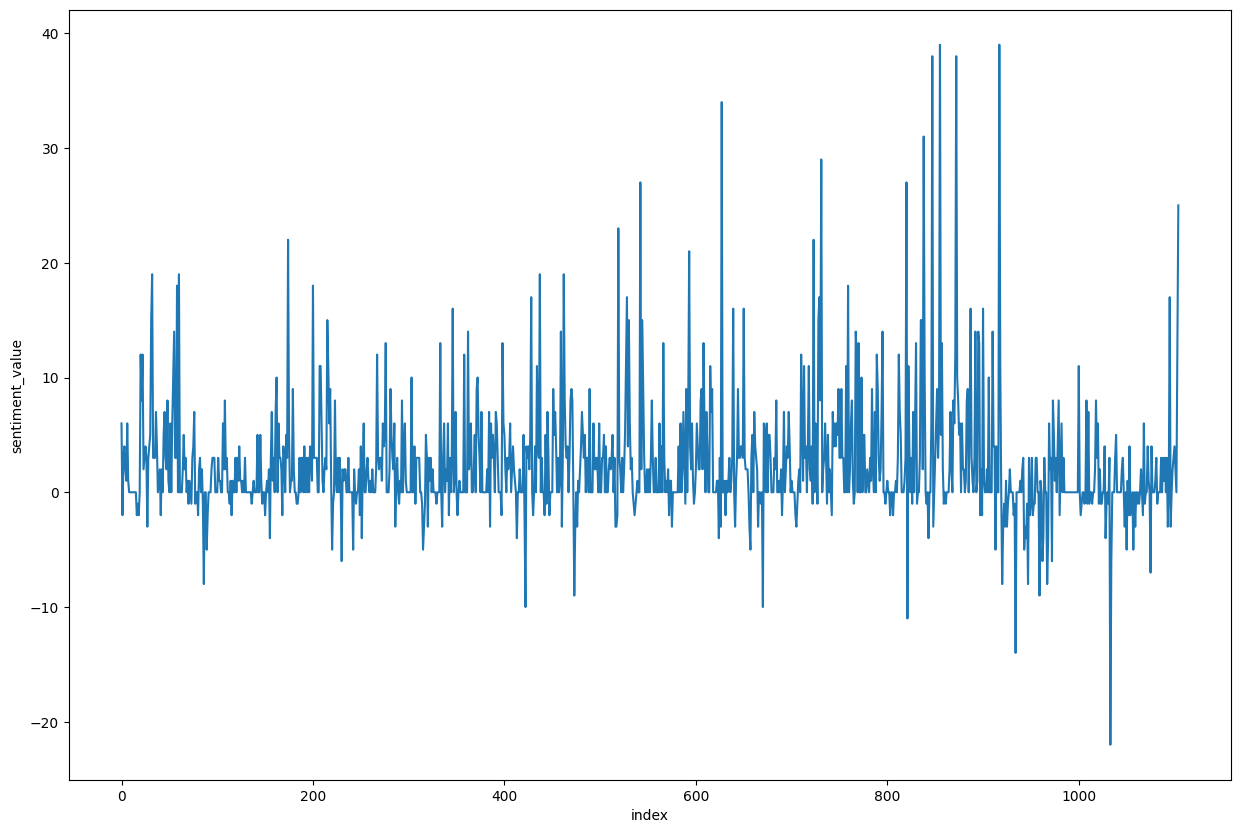

In [20]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

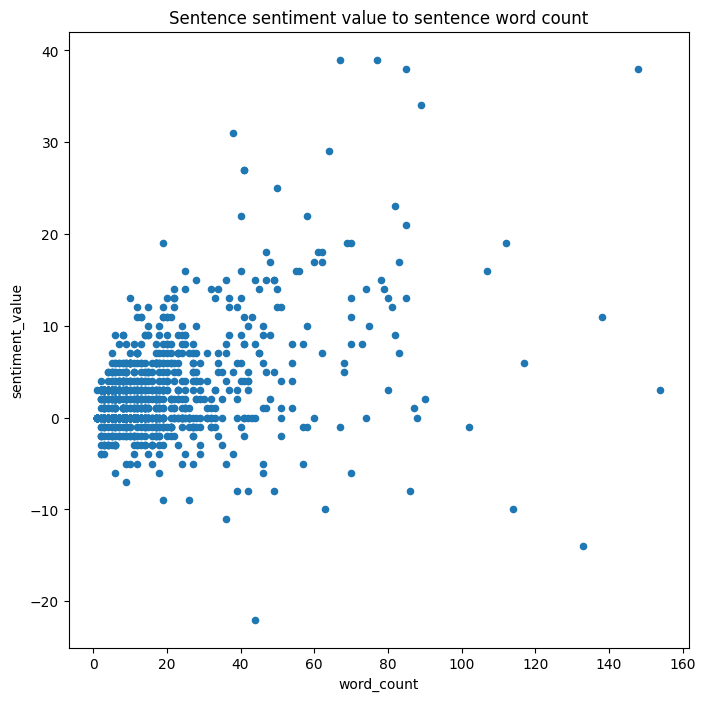

In [21]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

### Final Observations

There max positive sentiment value is 39. And the overall mean of the sentiment values is 2.5 which is much more than 0. So most of the reviews are positive in nature.